<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])


In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot

import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [7]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())


In [8]:
boston_df=pd.read_csv(boston_url)


#### Add your code below following the instructions given in the course to complete the peer graded assignment


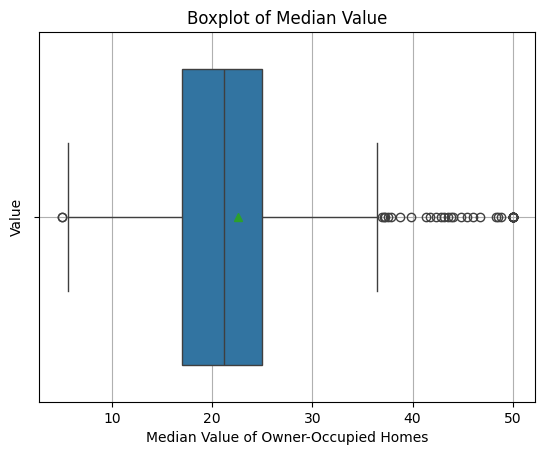

In [10]:
sns.boxplot(
    x = boston_df["MEDV"],  
    showmeans=True,  
)
plt.xlabel("Median Value of Owner-Occupied Homes")
plt.ylabel("Value")
plt.title("Boxplot of Median Value")
plt.grid(True)
plt.show()

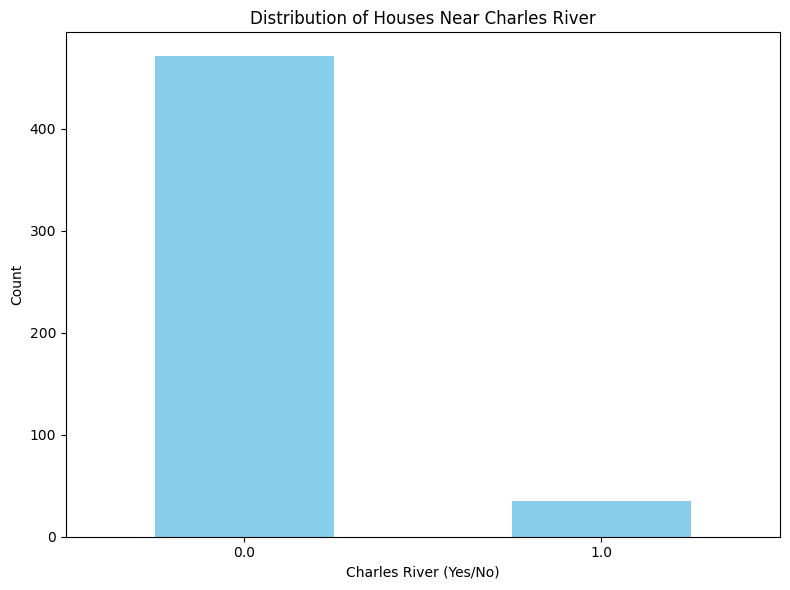

In [13]:
charles_river_counts = boston_df['CHAS'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(8, 6))
charles_river_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Charles River (Yes/No)')
plt.ylabel('Count')
plt.title('Distribution of Houses Near Charles River')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

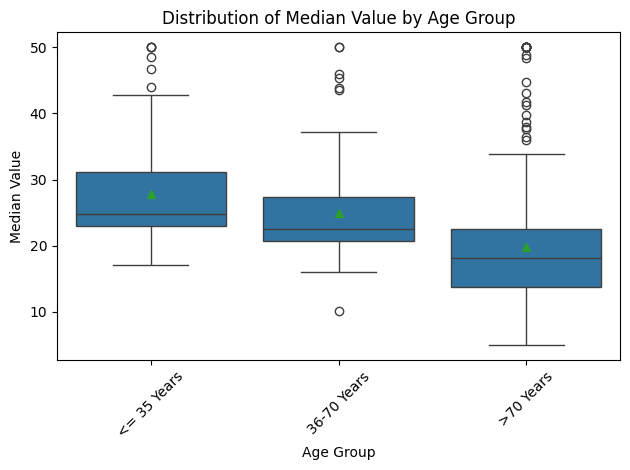

In [15]:
import numpy as np
age_groups = [0, 35, 70, np.inf]  
age_group_labels = ["<= 35 Years", "36-70 Years", ">70 Years"]
boston_df['Age_Group'] = pd.cut(boston_df['AGE'], bins=age_groups, labels=age_group_labels)
sns.boxplot(
    x = "Age_Group",
    y = "MEDV",
    showmeans=True, 
    data=boston_df
)
plt.xlabel("Age Group")
plt.ylabel("Median Value")
plt.title("Distribution of Median Value by Age Group")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

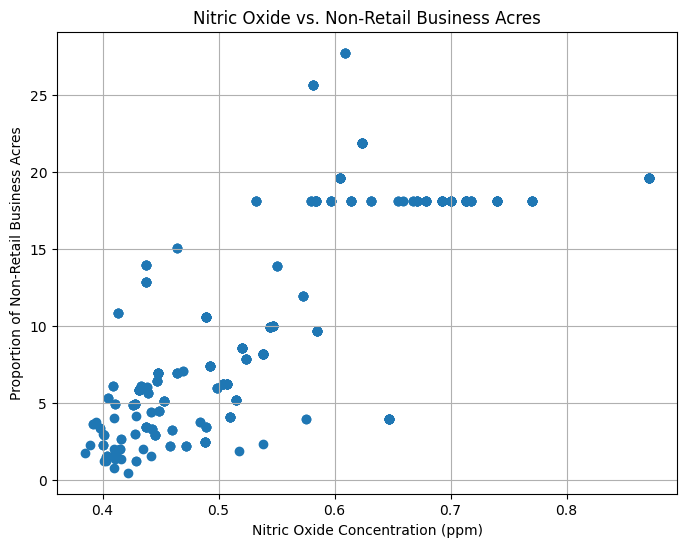

In [16]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.scatter(boston_df["NOX"], boston_df["INDUS"])
plt.xlabel("Nitric Oxide Concentration (ppm)")
plt.ylabel("Proportion of Non-Retail Business Acres")
plt.title("Nitric Oxide vs. Non-Retail Business Acres")
plt.grid(True)
plt.show()

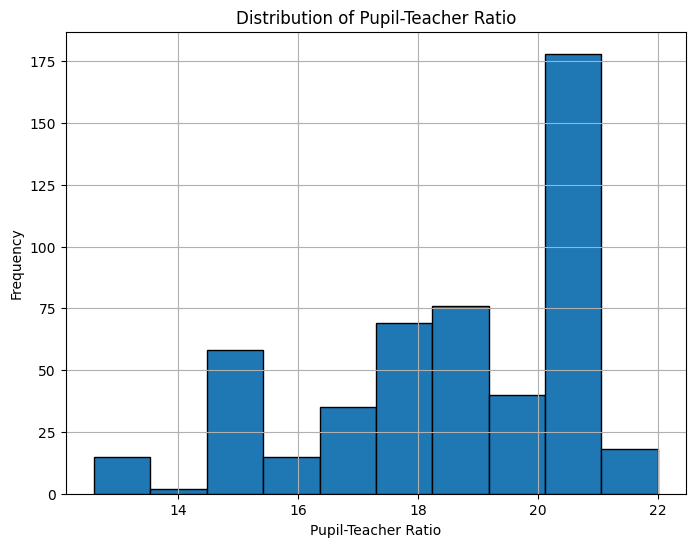

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.hist(boston_df["PTRATIO"], bins=10, edgecolor='black')  
plt.xlabel("Pupil-Teacher Ratio")
plt.ylabel("Frequency")
plt.title("Distribution of Pupil-Teacher Ratio")
plt.grid(True)
plt.show()

In [21]:
from scipy import stats
charles_river_yes = boston_df[boston_df['CHAS'] == "Yes"]  
charles_river_no = boston_df[boston_df['CHAS'] == "No"]
median_value_yes = charles_river_yes["MEDV"].median()
median_value_no = charles_river_no["MEDV"].median()
tstatistic, pvalue = stats.ttest_ind(charles_river_yes["MEDV"], charles_river_no["MEDV"])
if pvalue < 0.05:
    print("There is a statistically significant difference")
else:
    print("There is no statistically significant difference")
print("T-statistic:", tstatistic)
print("P-value:", pvalue)

There is no statistically significant difference
T-statistic: nan
P-value: nan


In [23]:
import pandas as pd
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
age_bins = [0, 0.2, 0.4, 0.6, 0.8, 1]  
age_groups = pd.cut(boston_df['AGE'], bins=age_bins, labels=age_bins[:-1]) 
formula = 'MEDV ~ C(AGE)'  
model = ols(formula=formula, data=boston_df).fit()
anova_results = anova_lm(model)
print(anova_results)

             df        sum_sq   mean_sq         F   PR(>F)
C(AGE)    355.0  29884.038419  84.18039  0.984009  0.55397
Residual  150.0  12832.256996  85.54838       NaN      NaN


In [24]:
import pandas as pd
from scipy import stats
nox = boston_df["NOX"]
indus = boston_df["INDUS"]
correlation, p_value = stats.pearsonr(nox, indus)
if abs(correlation) < 0.2:
  print("Weak or no linear relationship between Nitric Oxide and Non-Retail Business Acres.")
elif abs(correlation) >= 0.2:
  print("Moderate or strong linear relationship between Nitric Oxide and Non-Retail Business Acres.")
  print("Positive correlation" if correlation > 0 else "Negative correlation")

Moderate or strong linear relationship between Nitric Oxide and Non-Retail Business Acres.
Positive correlation


In [35]:
import pandas as pd
from statsmodels.formula.api import ols
formula = 'MEDV ~ DIS'
model = ols(formula=formula, data=boston_df).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 03 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        12:50:29   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     18.3901      0.817     22.499      0.0